In [16]:
# import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape[1:]

(28, 28)

# process the data

convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [4]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


# convert data to float and scale values between 0 and 1

In [5]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

# scale data

In [6]:
train_data /=255.0
test_data /=255.0

# change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [7]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# creating network-Added two more hidden layer and the activation to tanh & sigmoid

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(356, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

# Compile model

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 13s 56ms/step - loss: 0.3275 - accuracy: 0.8977 - val_loss: 0.1544 - val_accuracy: 0.9533
Epoch 2/10
235/235 [==============================] - 12s 51ms/step - loss: 0.1021 - accuracy: 0.9689 - val_loss: 0.1828 - val_accuracy: 0.9425
Epoch 3/10
235/235 [==============================] - 12s 52ms/step - loss: 0.0649 - accuracy: 0.9803 - val_loss: 0.1068 - val_accuracy: 0.9698
Epoch 4/10
235/235 [==============================] - 13s 57ms/step - loss: 0.0460 - accuracy: 0.9862 - val_loss: 0.0959 - val_accuracy: 0.9729
Epoch 5/10
235/235 [==============================] - 12s 52ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0791 - val_accuracy: 0.9785
Epoch 6/10
235/235 [==============================] - 13s 56ms/step - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.0758 - val_accuracy: 0.9809
Epoch 7/10
235/235 [==============================] - 14s 58ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.1101 - val_accuracy:

313/313 [==============================] - 2s 5ms/step - loss: 0.0992 - accuracy: 0.9804
Evaluation result on Test Data : Loss = 0.09920284152030945, accuracy = 0.980400025844574


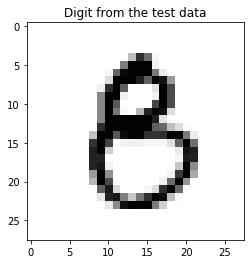

In [11]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
image_index = 800
plt.imshow(test_data[image_index].reshape(28, 28),cmap='Greys')
plt.title("Digit from the test data")
plt.show()

In [12]:
pred = model.predict(test_data[image_index].reshape(1,784))
print("Predicted digit:",pred.argmax())
print(history.history.keys())

Predicted digit: 8
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# summarize history for accuracy

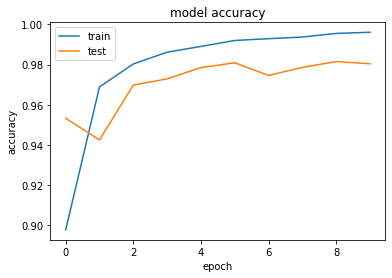

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

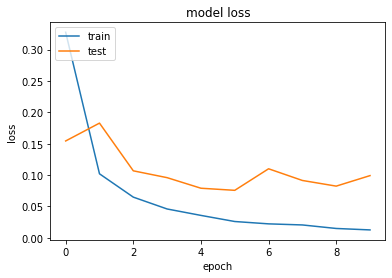

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()